<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>

# Exam (correction)



<div markdown=1 class=Abstract> 

**This subject contains two independent parts, which you can treat in whichever order you prefer:**

- [Part 1](#interp) is about polynomial interpolation.
- [Part 2](#acc) is about speeding up the convergence of some algorithms, with an application to fixed point iterations.

Within each part, it is recommended that you try to answer the questions in order, but if you get stuck on one question you can skip it and still use the results it contains to try to answer the other questions.

<div markdown=1 class=Abstract> 

**Instructions:**

- All the questions you have to answer are stated in **"Do it yourself"** cells.
- Provide your answers in the **"Answer"** cells already created, using markdown/latex formula when needed, or in code cells when you need to write some code.
- **Justify** (even if only briefly) your answers in the **"Answer"** cells.
- When looking at a picture you produced, the grader must be able to understand what is depicted without having to look at the code, so make sure to include relevant labels and titles when needed, **also when not demanded explicitely**.
- At the end of the exam (11:30), stop writing/typing, save and upload your notebook to the designated area on Moodle.
- **Reminder 1: If the notebook does not have the usual aspect, for instance if you do not have cells of different colors, click on the "not trusted" button in the top right corner. If you still do not get the usual aspect, execute the very last cell of the notebook.**
- **Reminder 2: Do not forget to execute the cell below, in order to load the required libraries.**


In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

from scipy.special import roots_legendre # in order to get the Gauss nodes

<a id="interp"></a>
## I) Interpolation at Gauss nodes

This part of the exam is about polynomial interpolation. We recall below two useful functions in that context. In this entire exam, $n$ denotes a nonnegative integer.

- `interpVDM`: Given interpolation nodes $x=(x_k)_{0\leq k\leq n}$ and values $y=(y_k)_{0\leq k\leq n}$, this function computes the coefficients $a=(a_k)_{0\leq k\leq n}$ of the Lagrange interpolation polynomial in the monomial basis.
- `evalHorner`: Given the coefficients $a=(a_k)_{0\leq k\leq n}$ of a polynomial in the monomial basis, and $X=(X_i)_{0\leq i\leq M}$, this function evaluates the polynomial at all the values in $X$.

In [2]:
def interpVDM(x,y):
    """
    Computation of the coefficients of the interpolation polynomial in the monomial basis, using a Vandermonde matrix
    -----------------------
    Inputs: 
    x : the interpolation nodes (1D array with pairewise distinct entries)
    y : the prescribed values at the interpolation nodes (1D array having the same size as x)
    
    Output: 
    a : the coefficients of the interpolation polynomial in the monomial basis (1D array having the same size as x)
    """
    # Construct the Vandermonde matrix 
    M = np.vander(x, increasing=True)
    # Solve the linear system
    a = np.linalg.solve(M, y)
    return a

In [3]:
def evalHorner(a,X):
    """
    Evaluation of a polynomial using Horner's scheme.
    -----------------------
    Inputs: 
    a : the coefficients of the polynomial P in the monomial basis 
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(x) for each x in X
    """
    PX = a[-1]
    for k in np.arange(1,a.size):
        PX = a[-1-k] + X*PX
    return PX

### I.1) Warm-up and first tests with Gauss nodes

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Given a continuous function $f:[-1,1]\to\mathbb{R}$, and $n+1$ interpolation nodes $x_0,x_1,\ldots,x_n$ in $[-1,1]$, recall the definition of $P_n(f)$, the (Lagrange) interpolation polynomial of $f$.

<div  markdown=1 class="Answer">

The interpolation polynomial of $f$, denoted $P_n(f)$, is the unique polynomial of degree at most $n$ such that
    
$$
P_n(f)(x_k) = f(x_k) \qquad{} \text{for all }k=0,\ldots,n.
$$

We are going to study the properties of this interpolation polynomial, for a specific choice of interpolation nodes, namely Gauss nodes. 

<div  markdown=1 class="Def">

The ($n+1$) Gauss nodes on $[-1,1]$ are the roots of the Legendre polynomial (of degree $n+1$).

We have seen these nodes already in the course, in the context of the Gauss-Legendre quadrature rules. Below is function which computes these nodes. *You need to call `xGauss(n+1)` in order to get $n+1$ interpolation nodes.*

In [4]:
def xGauss(n):
    """
    function returning n Gauss nodes in [-1,1]
    -----------------------
    Inputs: 
    n : integer
    
    Output:
    1D array containing the n nodes
    """
    return roots_legendre(n)[0]

<div  markdown=1 class="DoIt"> <span style="color:blue"> 3pts</span>

Consider the function $f_1$, defined on $[-1,1]$ as $f_1(x) = \cos(x)$. In the cell below, plot this function on $[-1,1]$, together with its interpolation polynomial, using $n=3$ and Gauss nodes for $x_0,x_1,\ldots,x_n$. *You may make use of some of the functions provided at the beginning of [Part 1](#interp).*

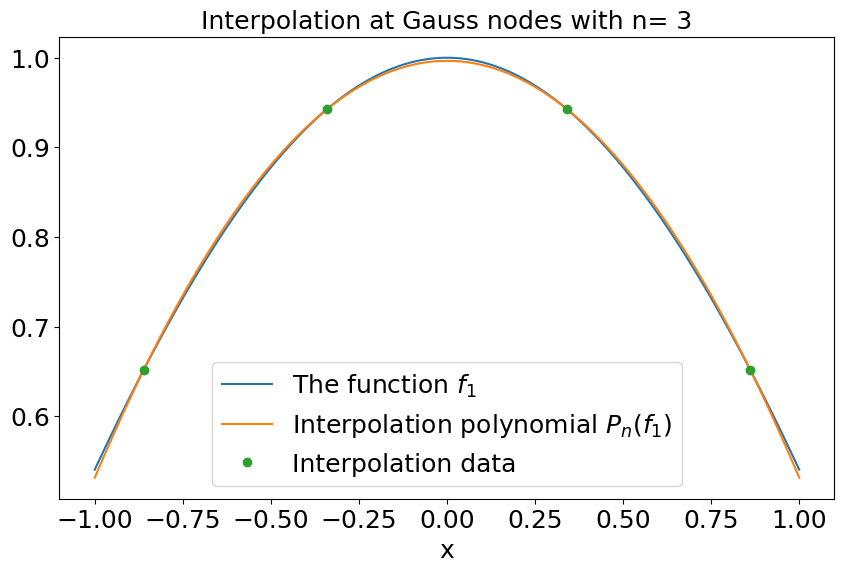

In [5]:
def f1(x):
    return np.cos(x)

n = 3
x = xGauss(n+1)   # n+1 Gauss nodes
X = np.linspace(-1, 1, 1001)  # values in [-1,1] where the function and the interpolation polynomial will be evaluated for the plot

# computes the coefficients of the interpolation polynomial, and then evaluate the polynomial at the points contained in X
a = interpVDM(x,f1(x))
PX = evalHorner(a,X)

# plot
plt.figure(figsize = (10,6))
plt.plot(X, f1(X), label="The function $f_1$")
plt.plot(X, PX, label="Interpolation polynomial $P_n(f_1)$")
plt.plot(x, f1(x), marker='o', linestyle='',label="Interpolation data")
plt.legend(fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.tick_params(labelsize=18)
plt.title('Interpolation at Gauss nodes with n= %i' %n, fontsize = 18)
plt.show()


<div  markdown=1 class="DoIt"> <span style="color:blue"> 3pts</span>

When $n$ goes to $+\infty$, what can you say about the global error between $f_1$ and $P_n(f_1)$, still using Gauss nodes as interpolation points? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).

<div  markdown=1 class="Thm"> (copy and paste the relevant theorem here)

<b>Uniform convergence for "regular" functions </b> 

Let $f : [a,b] \to \mathbb{R}$ be $\mathcal{C}^\infty$ and such that 

$$
\exists M>0, \quad{} \forall n\geq 1,\quad{} \sup_{x\in [a,b]} \lvert f^{(n)}(x)\rvert \leq M^n.
$$

Then, whatever the choice of the interpolation nodes, $P_n(f)$ *converges uniformly* to $f$ on the interval $[a,b]$:

$$
E_n(f) = \sup_{x\in[a,b]}\,\lvert f(x) - P_n(f)(x) \rvert \underset{n\to\infty}{\longrightarrow}0.
$$

<div  markdown=1 class="Answer"> 

The function $f_1$ is indeed $\mathcal{C}^\infty$, and for any $n\in\mathbb{N}$ we have,

$$
\sup_{x\in [-1,-1]} \lvert f^{(n)}(x)\rvert \leq 1.
$$

Therefore, the assumptions of the above theorem are satisfied with $M=1$, and $E_n(f)$ goes to $0$ when $n$ goes to $+\infty$ for any choice of interpolation nodes, and in particular for Gauss nodes.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 7pts</span>

In the cell below, plot the global error $E_n(f_1)$ for all $n$ between $0$ and $n_{max} = 40$, in an appropriate scale. Identify two different regimes, and comment upon them.

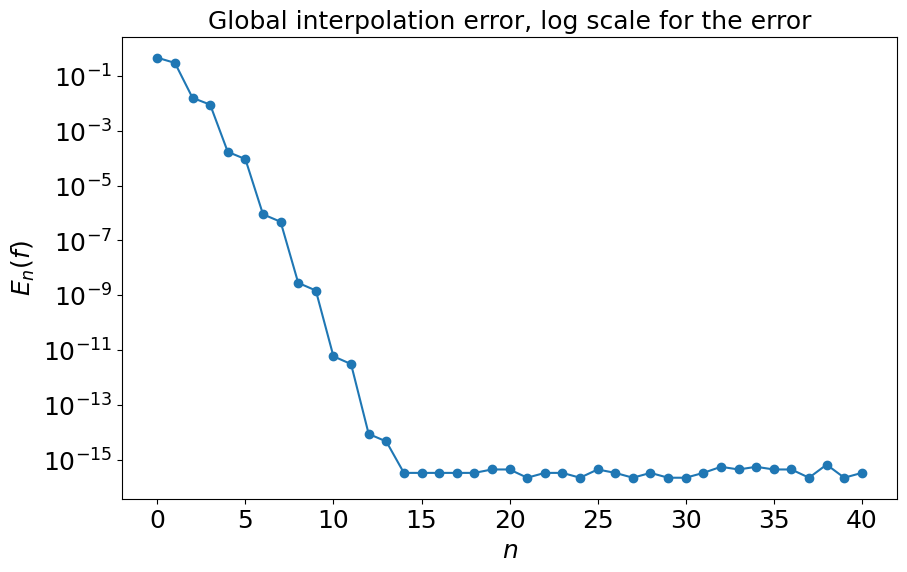

In [6]:
nmax = 40
f = f1

tab_n = np.arange(0, nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
tab_Enf = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xGauss(n+1) # n+1 Gauss nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_Enf[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_Enf, marker='o')
plt.yscale('log')
plt.title('Global interpolation error, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="Answer"> 

At first the error seems to go to $0$ as predicted by the above theorem. However, at some point the error saturates, at a value close to machine precision, because of rounding errors.

### I.2) Comparison with Chebyshev nodes

We are now going to compare the behavior of interpolation at Gauss nodes with interpolation at Chebyshev nodes, which we have already studied. We provide below a function which computes the Chebyshev nodes. *You need to call `xCheb(n+1)` in order to get $n+1$ Chebyshev nodes.*

In [7]:
def xCheb(n):
    """
    function returning n Chebyshev nodes in [-1,1]
    -----------------------
    Inputs: 
    n : integer
    
    Output:
    1D array containing the n nodes
    """
    if n == 0:
        return np.array([])
    else:
        x = np.cos( (2*np.arange(0,n)+1)*np.pi / (2*n) )
        return x

<div  markdown=1 class="DoIt"> <span style="color:blue"> 3pts</span>

In the cell below, reproduce the same plot as for the previous question, but also add the error when the interpolation polynomial is computed using Chebyshev nodes. How do interpolation at Gauss nodes and at Chebyshev nodes compare on this example? 

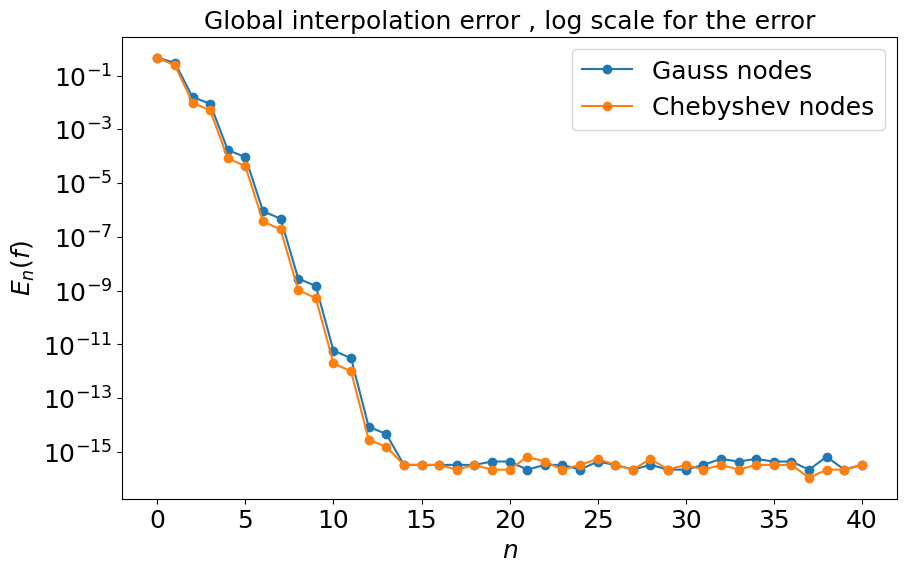

In [8]:
nmax = 40
f = f1

tab_n = np.arange(0, nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed

tab_EnfGauss = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xGauss(n+1) # n+1 Gauss nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_EnfGauss[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
tab_EnfCheb = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xCheb(n+1) # n+1 Chebyshev nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_EnfCheb[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_EnfGauss, marker='o', label='Gauss nodes')
plt.plot(tab_n, tab_EnfCheb, marker='o', label='Chebyshev nodes')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error , log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="Answer"> 

The two are very similar. (It seems that interpolation at Chebyshev nodes is slightly more accurate that interpolation at Gauss nodes, but only by a very tiny margin.)

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

We now consider the function $f_2$, defined on $[-1,1]$ as $f_2(x) = \frac{1}{1+25x^2}$. What is the name of this function? How does interpolation with equidistant nodes behave for this function? (You do not have to justify nor to illustrate this answer).

Plot and compare the global interpolation error for both Gauss nodes and at Chebyshev nodes for this function.

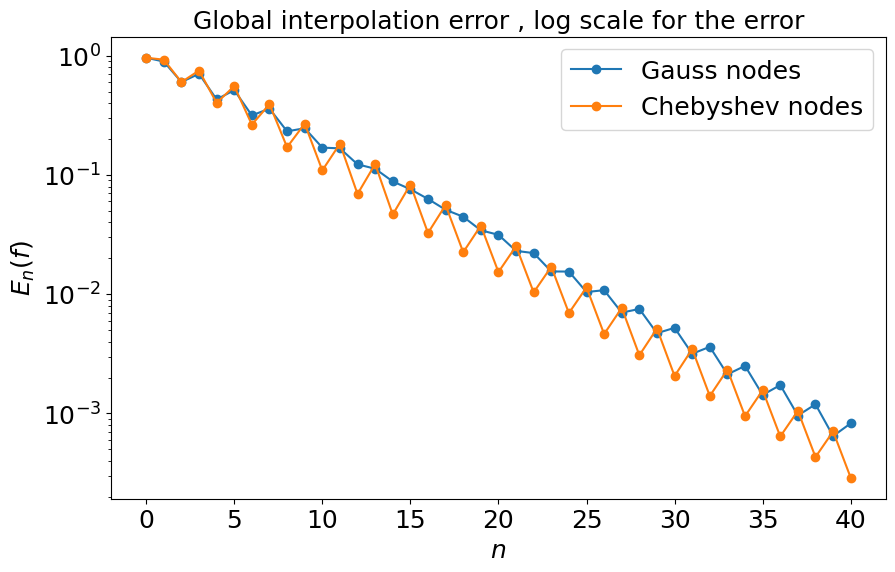

In [9]:
def f2(x):
    return 1/(1+25*x**2)

nmax = 40
f = f2

tab_n = np.arange(0, nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed

tab_EnfGauss = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xGauss(n+1) # n+1 Gauss nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_EnfGauss[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
tab_EnfCheb = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xCheb(n+1) # n+1 Chebyshev nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_EnfCheb[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_EnfGauss, marker='o', label='Gauss nodes')
plt.plot(tab_n, tab_EnfCheb, marker='o', label='Chebyshev nodes')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error , log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$E_{n}(f)$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="Answer"> 

This is the Runge function, for which interpolation at equidistant nodes does not converge. As in the previous example, the interpolation at Gauss nodes and at Chebyshev nodes seem to have very similar results.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Based on these two examples, how would you compare interpolation at Gauss nodes and at Chebyshev nodes? Can you give some (even partial) explanation or justification as to why these two choices of interpolation nodes compare in this way? *You may want to compare the nodes, or a relevant quantity involving the nodes. If relevant, you may add a code cell to illustrate you explanation.*

<div  markdown=1 class="Answer"> 

Overall, Gauss nodes and Chebyshev nodes seem to give very similar results for interpolation. 
This is not so surprising because Gauss nodes and Chebyshev nodes are actually rather close to each other (see the first cell below). Another quantity one could look at is $\sup_{x\in[-1,1]} \vert (x-x_0)\ldots(x-x_n)\vert$ for both choices of nodes. We saw that this quantity plays a crucial role in some of the error bounds we derived for $E_n(f)$, and it turns out to that Gauss nodes do not yield a much larger value than Chebyshev nodes, which are proven to be the nodes minimizing this quantity, (see the second cell below). 

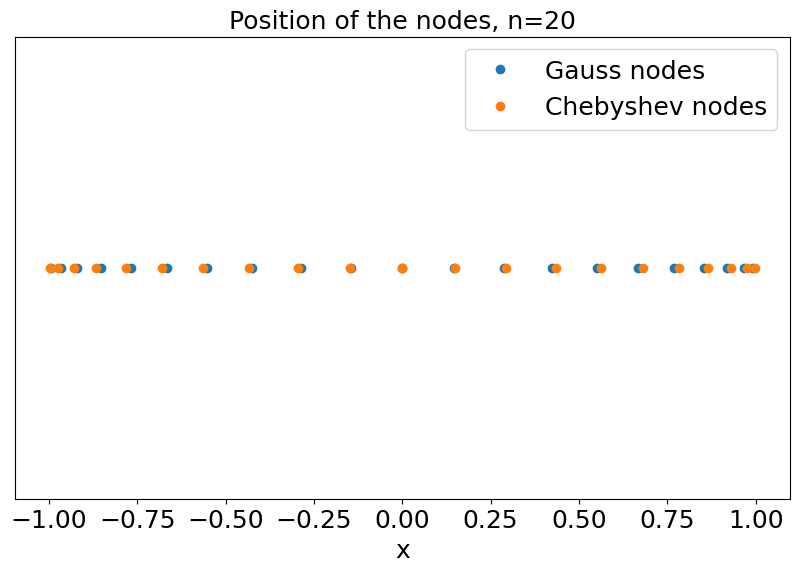

In [10]:
n = 20
xG = xGauss(n+1) #Gauss nodes
xC = xCheb(n+1) #Chebyshev nodes

# plot
fig = plt.figure(figsize=(10, 6))
plt.plot(xG, 0*xG, marker="o", linestyle="", label="Gauss nodes")
plt.plot(xC, 0*xC, marker="o", linestyle="", label="Chebyshev nodes")
plt.xlabel('x', fontsize = 18)
plt.legend(fontsize = 18)
plt.title('Position of the nodes, n=%s' %n, fontsize = 18) 
plt.tick_params(labelsize = 18)
plt.yticks([])
plt.show()

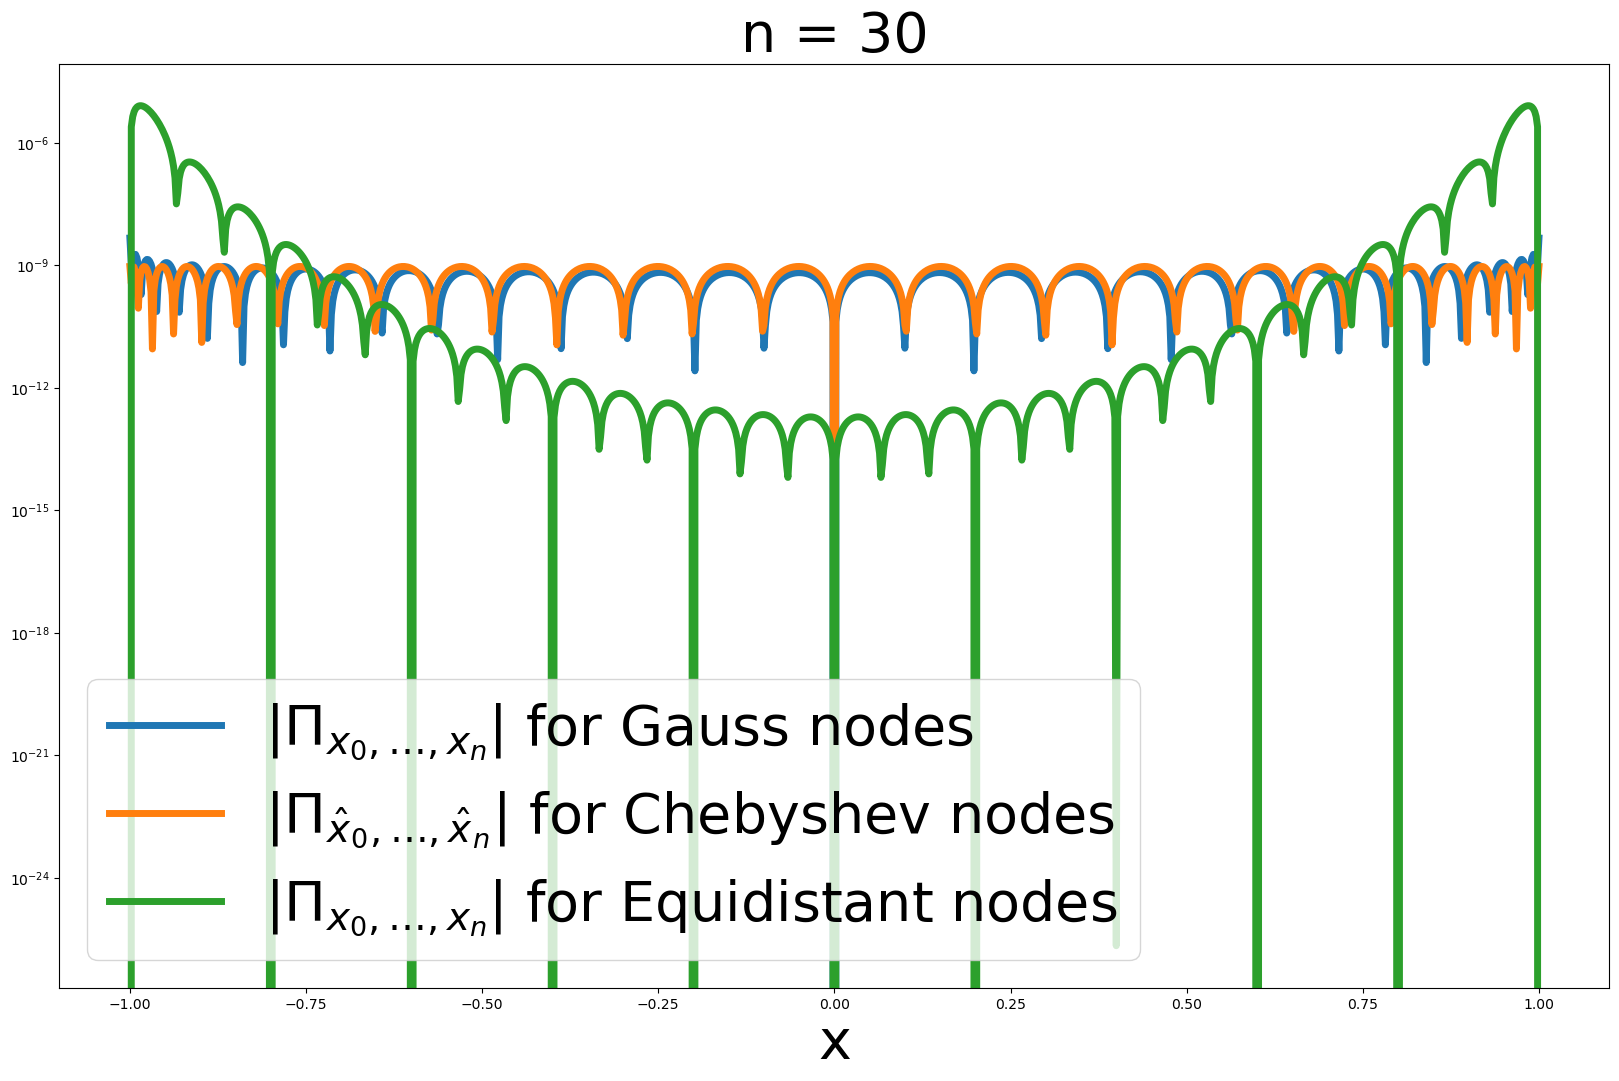

In [11]:
def evalPolywithRoots(x,X):
    """
    Evaluation of a monic polynomial described by its roots.
    -----------------------
    Inputs: 
    x : the zeros of polynomial P (P = \prod_k (x-x_k))
    X : an array of values at which we want to evaluate P 
    
    Output: 
    an array containing the values P(X_k) for each X_k in X
    """
    PX = 1
    for xk in x:
        PX = PX * (X-xk)
    return PX

n = 30
xG = xGauss(n+1) #Gauss nodes
xC = xCheb(n+1) #Chebyshev nodes
xE = np.linspace(-1, 1, n+1) #Equidistant nodes (to provide some comparison)
X = np.linspace(-1, 1, 1001)  # the points at which the polynomials will be evaluated and plotted

# Evaluate \bar Pi for Gauss nodes
PiG = evalPolywithRoots(xG, X)  
# Evaluate \hat Pi for Chebyshev nodes
PiC = evalPolywithRoots(xC, X)  
# Evaluate \hat Pi for equidistant nodes
PiE = evalPolywithRoots(xE, X)  

# plots
plt.figure(figsize = (20,12))
plt.plot(X, np.abs(PiG), linewidth=5, label='$|\Pi_{x_0,\ldots,x_n}|$ for Gauss nodes')
plt.plot(X, np.abs(PiC), linewidth=5, label='$|\Pi_{\hat x_0,\ldots,\hat x_n}|$ for Chebyshev nodes')
plt.plot(X, np.abs(PiE), linewidth=5, label='$|\Pi_{x_0,\ldots,x_n}|$ for Equidistant nodes')
plt.xlabel('x',fontsize = 40)
plt.legend(fontsize = 40)
plt.yscale('log')
plt.title('n = %i' %n, fontsize = 40)
plt.show()

### I.3) A more precise study of the global error

In this last section of Part I), we got back to studying **interpolation at Gauss nodes only**. *If, for some reason, you did not succeed in using interpolation at Gauss nodes, you can answer the questions of this section using interpolation at Chebyshev nodes instead.*

<div  markdown=1 class="DoIt"> <span style="color:blue"> 7pts</span>

Consider now the function $f_3$, defined on $[-1,1]$ as $f_3(x) = \vert x\vert^3$. In the cell below, plot the global error $E_n(f_3)$ for all $n$ between $0$ and $n_{max} = 40$, in the scale which best allows you to study precisely how $E_n(f_3)$ behaves with respect to $n$. Using this plot (or any extra mean you find useful) try to show that $E_n(f_3) \approx \frac{c}{n^\gamma}$, for a specific value of $\gamma$ that you will identify. What is the corresponding type of convergence (sublinear, linear, quadratic?)? *Hint: In the code, you may ignore the case where $n=0$ in order to avoid divisions by $0$.*

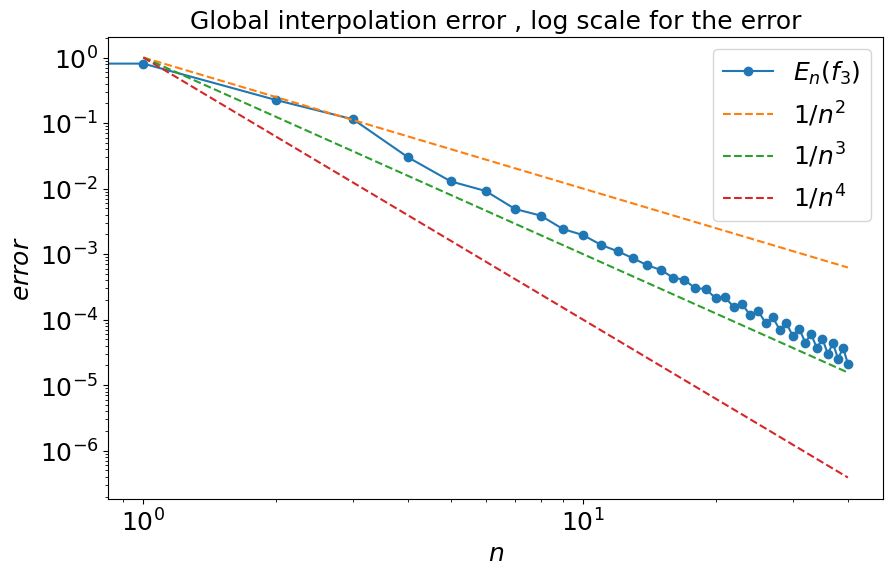

In [12]:
def f3(x):
    return np.abs(x)**3

nmax = 40
f = f3

tab_n = np.arange(0, nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
tab_Enf = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xGauss(n+1) # n+1 Gauss nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_Enf[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_Enf, marker='o', label='$E_n(f_3)$')
plt.plot(tab_n[1::], 1/tab_n[1::]**2, linestyle="--", label='$1/n^2$')
plt.plot(tab_n[1::], 1/tab_n[1::]**3, linestyle="--", label='$1/n^3$')
plt.plot(tab_n[1::], 1/tab_n[1::]**4, linestyle="--", label='$1/n^4$')
plt.legend(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.title('Global interpolation error , log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$error$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

In [13]:
ab = np.polyfit(np.log(tab_n[1::]), np.log(tab_Enf[1::]), 1) #Finding the coefficients of the line which better fits the data
gamma = -ab[0] # the slope
print("gamma is approximately equal to ",gamma)

gamma is approximately equal to  2.9664484725149785


<div  markdown=1 class="Answer"> 

Looking at $E_n(f_3)$ with respect to $n$ in log-log scale, we get a curve which is close to a straight line, whose slope is $-\gamma$. Indeed, if 

$$
\ln(E_n(f_3)) \approx a \ln(n) + b,
$$

then

$$
E_n(f_3)) \approx e^b n^a = \frac{e^b}{n^{-a}},
$$

and therefore $\gamma = -a$. Either graphically or by using `polyfit`, we find that $\gamma\approx 3$.

We have 

$$
\frac{E_{n+1}(f_3))}{E_n(f_3))} \approx \left(\frac{n}{n+1}\right)^3,
$$ 

which goes to $1$ when $n$ goes to $+\infty$, therefore the convergence is sublinear.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 3pts</span>

Finally, consider now the function $f_4$, defined on $[-1,1]$ as $f_4(x) = \vert x\vert^4$. In the cell below, plot the global error $E_n(f_4)$ for all $n$ between $0$ and $n_{max} = 40$. What happens to $E_n(f_4)$? Explain.

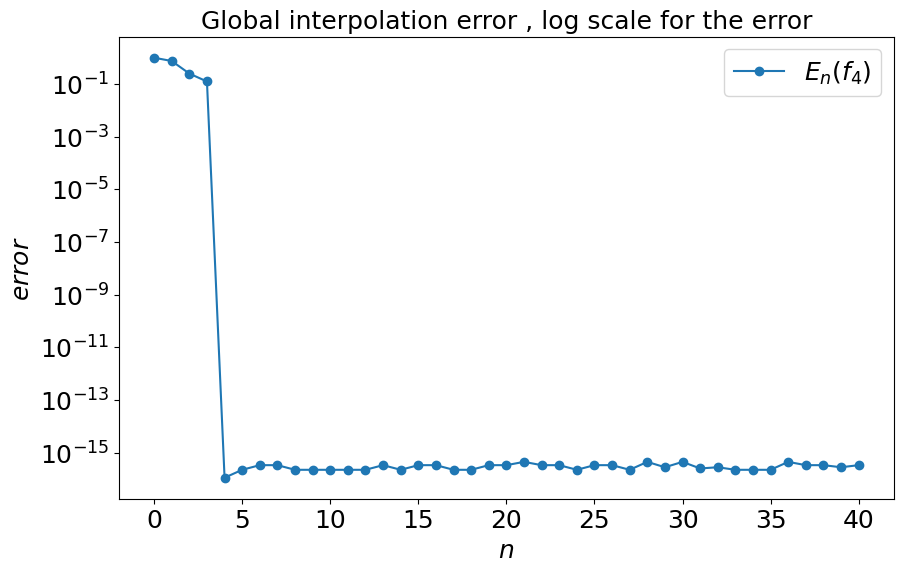

In [14]:
def f4(x):
    return np.abs(x)**4

nmax = 40
f = f4

tab_n = np.arange(0, nmax+1) # values of n for which the error E_n(f) = sup |f-P_n(f)| has to be computed
tab_Enf = np.zeros(nmax+1) # Pre-allocation
for n in tab_n:
    x = xCheb(n+1) # n+1 Gauss nodes to compute the interpolant
    y = f(x)   # values of f1 at the nodes
    a = interpVDM(x, y) # the coefficients of the interpolation polynomial P_n(f)
    PnfX = evalHorner(a, X) # values of P_n(f) at the points stored in X   
    tab_Enf[n] = np.max(np.abs( PnfX - f(X) )) # computation of E_n(f)
    
plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_Enf, marker='o', label=r"$E_n(f_4)$")
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Global interpolation error , log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$error$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="Answer"> 

As soon as $n\geq 4$, $E_n(f_4) = 0$ (or at least, $E_n(f_4) \approx 0$, up to machine precision). Indeed, $f_4(x) = \vert x\vert^4 = x^4$, therefore $f_4$ is simply a polynomial function of degree $4$, and by uniqueness of the Lagrange interpolation polynomial we have $P_n(f_4) = f_4$ for all $n\geq 4$.

<a id="acc"></a>
## II) Acceleration of convergence and fixed point iterations

<a id="gene"></a>
### II.1) Generalities

In this part, we consider $x^*\in\mathbb{R}$ and $(x_n)_{n\in\mathbb{N}}$ a sequence of real numbers converging to $x^*$ such that, for all $n\in\mathbb{N}$,

$$
x_n = x^* + \alpha\rho^n + \mu^n C_n,
$$

where $\alpha$, $\rho$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0< \vert \mu \vert < \vert \rho\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ is a bounded sequence (that is, there exists $M\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert C_n\vert \leq M$).

Given such a sequence $(x_n)_{n\in\mathbb{N}}$, we introduce the sequence $(y_n)_{n\in\mathbb{N}}$ defined by

$$
y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}, \quad{} \forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> <span style="color:blue"> 1pt</span>

What can you say regarding the convergence of $(y_n)$? *(no justification needed here)*

<div  markdown=1 class="Answer"> 

We have 

$$
\lim_{n\to\infty} x_n = \lim_{n\to\infty} x_{n+1} = x^*,
$$

therefore 

$$
\lim_{n\to\infty} y_n = \frac{x^* - \rho x^*}{1-\rho} = \frac{x^*(1 - \rho)}{1-\rho} = x^*,
$$

the sequence $(y_n)$ converges and its limit is also $x^*$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

In the cell below, complete the code so that, given a vector $x=(x_0,\ldots,x_N)$ and a real number $\rho\in(-1,1)$, the function outputs the vector $y=(y_0,\ldots,y_{N-1})$ where $y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}$ for all $n\in\{0,1,\ldots,N-1\}$.

In [15]:
def x2y(x, rho):
    """
    Given (finitely many terms of) a sequence (x_n), computes the corresponding y_n as defined above
    -----------------------
    Inputs: 
    x: vector (x_0,...,x_N)
    rho: real number in (-1,1)
    
    Output:
    y: vector (y_0,...,y_{N-1})
    """
    
    y = (x[1::]-rho*x[:-1:]) / (1-rho)
    return y

We now look at a specific example, and consider the sequence $(x_n)_{n\in\mathbb{N}}$ defined by

$$
x_n = 3 + 5\left(\frac{1}{2}\right)^n + \left(-\frac{1}{4}\right)^n, \quad{}\forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

Does this sequence $(x_n)_{n\in\mathbb{N}}$ converge when $n$ goes to $\infty$, and if yes, what is its limit $x^*$?

<div  markdown=1 class="Answer"> 

Since $\left\vert \frac{1}{2}\right\vert<1$ and $\left\vert -\frac{1}{4}\right\vert<1$, $(x_n)$ indeed converges, and the limit is $x^*=3$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

In the cell below, create a vector $x$ containing the first terms of the sequence 

$$
x_n = 3 + 5\left(\frac{1}{2}\right)^n + \left(-\frac{1}{4}\right)^n,
$$

up to $n=20$. Taking $\rho = 1/2$, compute the corresponding values of $y$ using the function you created just above. Study graphically or numerically the order and rate of convergence of $(x_n)$ and of $(y_n)$.

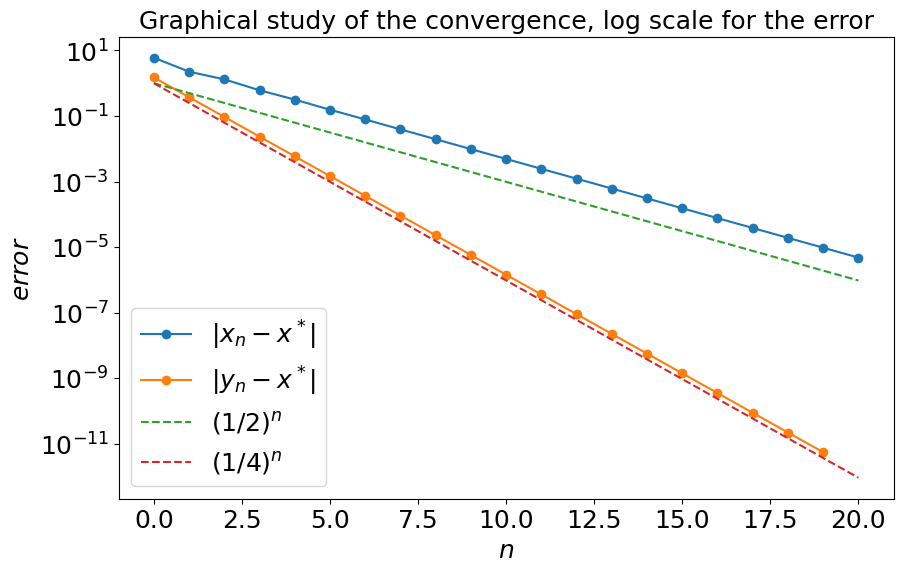

In [16]:
n_max = 20
tab_n = np.arange(0,n_max+1)
x = 3 + 5*(1/2)**tab_n + (-1/4)**tab_n
xstar = 3

y = x2y(x,1/2)
tab_err_x = np.abs(x-xstar)
tab_err_y = np.abs(y-xstar)

plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_err_x, marker='o', label=r'$\vert x_n-x^*\vert$')
plt.plot(tab_n[:-1], tab_err_y, marker='o', label=r'$\vert y_n-x^*\vert$')
plt.plot(tab_n, (1/2)**tab_n, linestyle="--", label='$(1/2)^n$')
plt.plot(tab_n, (1/4)**tab_n, linestyle="--", label='$(1/4)^n$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Graphical study of the convergence, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$error$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="Answer"> 

When plotting the error versus $n$ with a logarithmic scale in the $y$ axis, we get lines, meaning that the convergence is linear (order of convergence 1), both for $(x_n)$ and for $(y_n)$. The rate can be found by looking at the slope of these lines, and it looks like the rate of convergence for $(x_n)$ is equal to $1/2$, while it is equal to $1/4$ for $(y_n)$. These rates of convergence can also be recovered using polyfit (see the cell below). 

In [17]:
ab_x = np.polyfit(tab_n, np.log(tab_err_x), 1) #Finding the coefficients of the line which better fits the data
C_x = np.exp(ab_x[0]) # the slope
print("the rate of convergence for (x_n) is approximately equal to ",C_x)

ab_y = np.polyfit(tab_n[:-1:], np.log(tab_err_y), 1) #Finding the coefficients of the line which better fits the data
C_y = np.exp(ab_y[0]) # the slope
print("the rate of convergence for (y_n) is approximately equal to ",C_y)

the rate of convergence for (x_n) is approximately equal to  0.49926012075118176
the rate of convergence for (y_n) is approximately equal to  0.25


We now go back to considering an arbitrary $x^*\in\mathbb{R}$ and a general sequence $(x_n)_{n\in\mathbb{N}}$ of the form

$$
x_n = x^* + \alpha\rho^n + \mu^n C_n, \quad{}\forall~n\in\mathbb{N},
$$

where $\alpha$, $\rho$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0< \vert \mu \vert < \vert \rho\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ is a bounded sequence (that is, there exists $M\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert C_n\vert \leq M$).

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

What are the order and the rate of convergence for such a sequence $(x_n)_{n\in\mathbb{N}}$? 

<div  markdown=1 class="Answer"> 

Denoting $e_n = \vert x_n-x^*\vert$, and using that $\vert \mu \vert < \vert \rho\vert$, we get

$$
\frac{e_{n+1}}{e_n} = \frac{\left\vert \alpha\rho^{n+1} + \mu^{n+1}C_{n+1}\right\vert}{\vert \alpha\rho^n + \mu^n C_n \vert} = \vert \rho\vert \frac{\left\vert \alpha + \left(\frac{\mu}{\rho}\right)^{n+1}C_{n+1}\right\vert}{\vert \alpha + \left(\frac{\mu}{\rho}\right)^{n}C_{n} \vert} \underset{n\to \infty}{\longrightarrow} \vert\rho\vert\frac{\vert\alpha\vert}{\vert\alpha\vert} = \vert\rho\vert.
$$

Since it is assumed that $\vert \rho\vert>0$, the order of convergence is $1$, and the rate of convergence is $\vert\rho\vert$.

We recall that the sequence $(y_n)_{n\in\mathbb{N}}$ (associated to such a sequence $(x_n)_{n\in\mathbb{N}}$), is defined by

$$
y_n = \frac{x_{n+1} - \rho x_n}{1-\rho}, \quad{} \forall~n\in\mathbb{N}.
$$

<div  markdown=1 class="DoIt"> <span style="color:blue"> 2pts</span>

*Reminder: if you get stuck while trying to solve this question, you can take its results for granted and use them to solve the following questions.*

Compute $y_n - x^*$ (*you should find an expression in terms of $\mu$, $\rho$, $n$, $C_n$ and $C_{n+1}$*).

Then, show that there exists a bounded sequence $(\tilde{C}_n)_{n\in\mathbb{N}}$ (that is, there exists $\tilde{M}\geq 0$ such that, for all $n\in\mathbb{N}$, $\vert \tilde{C}_n\vert \leq \tilde{M}$) such that

$$
y_n - x^* = \mu^n \tilde{C_n}.
$$

<div  markdown=1 class="Answer"> 

We compute

\begin{align*}
y_n - x^* &= \frac{x_{n+1}-x^* - \rho(x_n-x^*)}{1-\rho} \\
& = \frac{\alpha\rho^{n+1} + \mu^{n+1} C_{n+1} - \rho\left(\alpha\rho^n + \mu^n C_n\right)}{1-\rho} \\
& = \mu^n\frac{\mu C_{n+1} - \rho C_n}{1-\rho}.
\end{align*}

Denoting $\tilde{C}_n = \frac{\mu C_{n+1} - \rho C_n}{1-\rho}$, we have that the sequence $(\tilde{C}_n)_{n\in\mathbb{N}}$ is bounded because $(C_n)_{n\in\mathbb{N}}$ is. Indeed, for all $n\in\mathbb{N}$,

$$
\left\vert \tilde{C}_n \right\vert \leq \frac{\vert \mu C_{n+1}\vert + \vert\rho C_n\vert }{1-\rho} \leq M\frac{\vert \mu \vert + \vert\rho \vert }{1-\rho}.
$$

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Assuming $\frac{\vert\tilde{C}_{n+1}\vert}{\vert\tilde{C}_{n}\vert}  \underset{n\to \infty}{\longrightarrow} 1$, what can you say about the order and rate of convergence of $(y_n)$. How does it compare to the convergence of $(x_n)$?

<div  markdown=1 class="Answer"> 

Starting from $y_n - x^* = \mu^n \tilde{C_n}$, and assuming that $\frac{\vert \tilde{C}_{n+1} \vert}{\vert \tilde{C}_{n} \vert} \underset{n\to \infty}{\longrightarrow} 1$, we get

$$
\frac{\vert y_{n+1} - x^*\vert}{\vert y_n - x^*\vert} = \vert\mu\vert \frac{\vert\tilde{C}_{n+1}\vert}{\vert\tilde{C}_{n}\vert} \underset{n\to \infty}{\longrightarrow} \vert\mu\vert.
$$

That is, the order of convergence of $(y_n)$ is still $1$, but the rate of convergence is now $\vert\mu\vert$. Since $\vert\mu\vert < \vert\rho\vert$, $(y_n)$ converges to $x^*$ faster than $(x_n)$.

### II.2) Application to fixed point iterations

In this last part of the exam, we consider a $\mathcal{C}^1$ function $g:I\to\mathbb{R}$, where $I$ is some (non-empty) interval, $x_0\in I$, and the sequence $(x_n)_{n\in\mathbb{N}}$ of fixed point iterations defined by $x_{n+1} = g(x_n)$ for all $n\geq 0$. We also assume there exists a fixed point $x^*$ of $g$ in $I$, that is, $g(x^*) = x^*$, and that $\vert g'(x^*)\vert < 1$.

For any given function $g$ and initial point $x_0$, you can use the following function to generate (finitely many values of) the sequence $(x_n)$.

In [18]:
def FixedPoint(g, x0, n_max):
    """
    Computes the fixed point sequence x_{n+1} = g(x_n) up to n=n_max
    -----------------------
    Inputs: 
    g: the function
    x0: initial point
    n_max : maximal number of iterations
    
    Output: 
    x: a vector containing x_0,x_1,...,x_{n_max} 
    """
    x = np.zeros(n_max+1)  # create a vector x of zeros with size n_max+1
    x[0] = x0  
    for n in np.arange(1,n_max+1):
        x[n] = g(x[n-1])
    return x

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Assuming $(x_n)$ converges to $x^*$, use a first order Taylor-expansion of $g$ around $x^*$ in order to approximate $x_{n+1}$ by an expression involving $x_n$, $x^*$ and $g'(x^*)$.

If $g$ is an affine map, this approximation becomes exact. In that case, show that, for all $n\geq 0$,

$$
x_n = x^* + \alpha\rho^n,
$$

for some $\rho$ that you will identify.

<div  markdown=1 class="Answer"> 

A first order Taylor expansion of $g$ around $x^*$ yields

$$
x_{n+1} = g(x_n) \approx g(x^*) + g'(x^*)(x_n-x^*) = x^* + g'(x^*)(x_n-x^*).
$$

When we have exactly $x_{n+1} = x^* + g'(x^*)(x_n-x^*)$, we can rewrite this as

$$
x_{n+1} - x^* = g'(x^*)(x_n-x^*),
$$

hence $x_n-x^*$ is a geometric sequence:

$$
x_n-x^* = \left(g'(x^*)\right)^n (x_0-x^*).
$$

We can rewrite this as

$$
x_n = x^* + (x_0-x^*)\left(g'(x^*)\right)^n,
$$

and $\rho = g'(x^*)$.

For a general function $g$ (not necessarily affine), if the sequence of fixed point iterations $(x_n)$ converges to $x^*$, we will assume that 

$$
x_n = x^* + \alpha\left(g'(x^*)\right)^n + \mu^n C_n,
$$

where $\alpha$ and $\mu$ are real numbers, with $\alpha\neq 0$, $0 < \vert \mu \vert < \vert g'(x^*)\vert <1$, and $(C_n)_{n\in\mathbb{N}}$ a bounded sequence.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

Consider the function $g:(0,+\infty)\to\mathbb{R}$ defined as $g(x) = \frac{1}{x} - \frac{1}{2} + x$, whose unique fixed point is $x^*=2$.

For $x_0$ close enough to $x^*$, what can you say regarding the convergence of the sequence $(x_n)_{n\in\mathbb{N}}$ of fixed point iterations? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).

<div  markdown=1 class="Thm"> (copy and paste the relevant theorem here)

**Local convergence/divergence for fixed point iterations.** Let $g: (a,b)\to \mathbb{R}$ be a continuous function, having a fixed point $x^*$ and such that $g$ is differentiable at $x^*$. Consider the sequence $x_{k+1}=g(x_k)$ for $k\geq 0$, $x_0$ being given.

- If $\vert g'(x^*) \vert <1$, there exists $\eta >0$ such that, if $x_0 \in I_\eta = [x^*-\eta, x^*+\eta]$, then $(x_k)_k$ converges to $x^*$, and the convergence is at least linear. If $g'(x^*)\neq 0$, the convergence is exactly linear , and the rate of convergence is $\vert g'(x^*) \vert$.

<div  markdown=1 class="Answer"> 

We have $g'(x) = -\frac{1}{x^2} + 1$, therefore $g'(x^*) = -\frac{1}{2^2} + 1 = \frac{3}{4}$, and in particular $\vert g'(x^*)\vert < 1$. Therefore, according to the theorem copied above, the sequence of fixed point iterations converges to $x^*$, linearly and with rate $\vert g'(x^*)\vert = \frac{3}{4}$.

<div  markdown=1 class="DoIt"> <span style="color:blue"> 5pts</span>

Still considering $g(x) = \frac{1}{x} - \frac{1}{2} + x$, take $x_0=1$ and compute the sequence $(x_n)$ of fixed point iterations up to $n=50$. Then, compute a sequence $(y_n)$ as in [Part II.1)](#gene), with an appropriate value of $\rho$, in order to obtain a sequence converging to $x^*$ faster than $(x_n)$. Check graphically that $(y_n)$ does indeed converge faster than $(x_n)$. *For the moment, you may use the fact that you know $x^*$ in order to select $\rho$*.

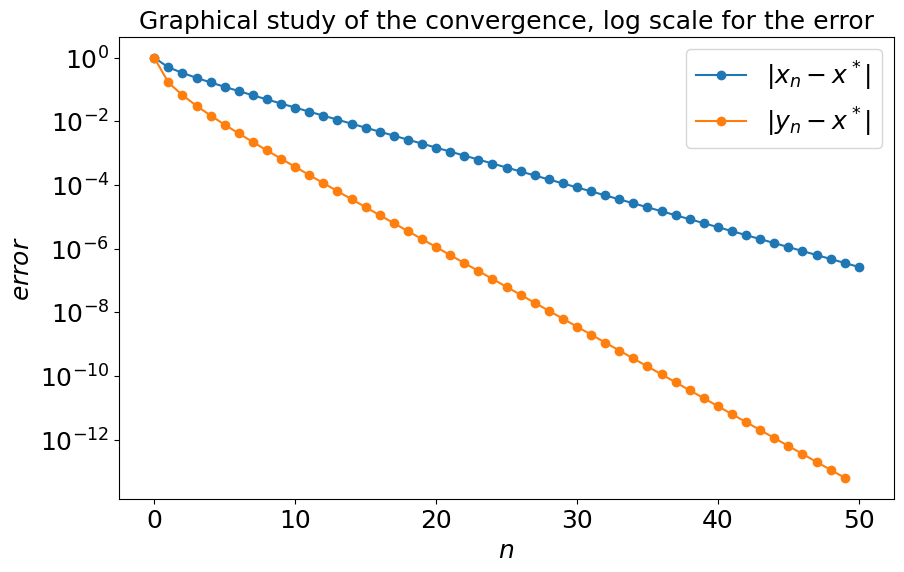

In [19]:
def g(x):
    return 1/x -1/2 + x

xstar = 2
x0 = 1
n_max = 50
x = FixedPoint(g, x0, n_max)
rho = 3/4
y = x2y(x,rho)
tab_err_x = np.abs(x-xstar)
tab_err_y = np.abs(y-xstar)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,n_max+1), tab_err_x, marker='o', label=r'$\vert x_n-x^*\vert$')
plt.plot(np.arange(0,n_max), tab_err_y, marker='o', label=r'$\vert y_n-x^*\vert$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Graphical study of the convergence, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$error$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

<div  markdown=1 class="DoIt"> <span style="color:blue"> 4pts</span>

In the previous question, we could select an appropriate value of $\rho$ so that $(y_n)$ converges faster than $(x_n)$ because we already knew the value of $x^*$, which is typically not going to be the case since $x^*$ is what we are trying to approximate. Can you propose another sequence $(z_n)$, still defined in terms of $(x_n)$ but no longer involving $x^*$, for which one could also hope to have faster convergence than $(x_n)$? Implement your proposition, and test it for $g(x) = \frac{1}{x} - \frac{1}{2} + x$, still with $x_0=1$.


<div  markdown=1 class="Answer"> 

We can simply replace each instance of $x^*$ by $x_n$, and hope to get a comparable rate of convergence when $x_n$ gets close to $x^*$. That is, instead of using

$$
y_n = \frac{x_{n+1} - g'(x^*) x_n}{1-g'(x^*)}, \quad{} \forall~n\in\mathbb{N}.
$$

we take

$$
z_n = \frac{x_{n+1} - g'(x_n) x_n}{1-g'(x_n)}, \quad{} \forall~n\in\mathbb{N}.
$$

For the example below, it seems that $(z_n)$ converges as fast as $(y_n)$.

In [20]:
def x2z(x, derg):
    """
    Given (finitely many terms of) a sequence (x_n), computes the corresponding z_n as defined above
    -----------------------
    Inputs: 
    x: vector (x_0,...,x_N)
    derg: the function g'
    
    Output:
    z: vector (z_0,...,z_{N-1})
    """
    
    z = (x[1::]-derg(x[:-1:])*x[:-1:]) / (1-derg(x[:-1:]))
    return z

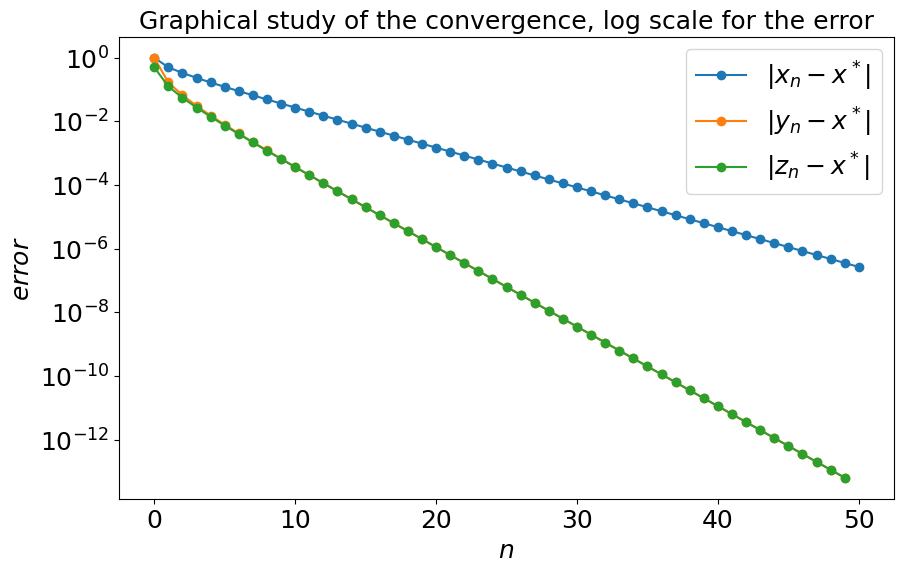

In [21]:
def g(x):
    return 1/x -1/2 + x

def derg(x):
    return -1/x**2 + 1

xstar = 2
x0 = 1
n_max = 50
x = FixedPoint(g, x0, n_max)
rho = 3/4
y = x2y(x,rho)
z = x2z(x,derg)
tab_err_x = np.abs(x-xstar)
tab_err_y = np.abs(y-xstar)
tab_err_z = np.abs(z-xstar)
tab_n = np.arange(0,n_max+1)

plt.figure(figsize=(10, 6))
plt.plot(tab_n, tab_err_x, marker='o', label=r'$\vert x_n-x^*\vert$')
plt.plot(tab_n[:-1], tab_err_y, marker='o', label=r'$\vert y_n-x^*\vert$')
plt.plot(tab_n[:-1], tab_err_z, marker='o', label=r'$\vert z_n-x^*\vert$')
plt.legend(fontsize = 18)
plt.yscale('log')
plt.title('Graphical study of the convergence, log scale for the error', fontsize = 18)
plt.xlabel('$n$',fontsize = 18)
plt.ylabel('$error$',fontsize = 18)
plt.tick_params(labelsize=18)
plt.show()

# END

**Computation of the grade**

There was a total of <span style="color:blue"> 73 pts</span> distributed among all the questions. You needed 60 pts or more in order to get the maximal grade (20/20), otherwise the grade was computed as $(\text{nb of points})/60\times20$.

In [22]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()